In [2]:
import pandas as pd #import Pandas
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

In [3]:
dados = pd.read_csv('breast_cancer_diagnosis.csv')
dados.isnull().sum().sum()

9

In [4]:
# Carregando os dados
dados = pd.read_csv('breast_cancer_diagnosis.csv')
#Como o numero de NaNs e relavtivamente baixo quando comparados ao tamanho da database, decidimos exlui-las
dados = dados.dropna()

#Juntando colunas categóricas separadas
dados['age_group'] = dados['Start Age'].astype('string') + '-' + dados['End Age'].astype('string')
dados['env_nodes_group'] = dados['Start_env_nodes'].astype('string') + '-' + dados['end_env_nodes'].astype('string')
dados['tumor_size'] = dados['Start tumor size'].astype('string') + '-' + dados['End tumor size'].astype('string')

#Deletando colunas que não serão utilizadas, já que seu conteúdo foi adicionado a outra coluna
del dados['End Age']
del dados['Start Age']
del dados['Start_env_nodes']
del dados['end_env_nodes']
del dados['Start tumor size']
del dados['End tumor size']

#Atribuindo à variável target a coluna class
target = dados.pop('Class')
dados.insert(9,'Class',target)

#Ajustando os tipos de variáveis
dados['menopause'] = dados['menopause'].astype('category')
dados['menopause'].cat.categories = ['premeno', 'ge40', 'lt40']

dados['breast'] = dados['breast'].astype('category')
dados['breast'].cat.categories = ['right', 'left']

dados['node-caps'] = dados['node-caps'].astype('category')

dados['deg-malig'] = dados['deg-malig'].astype('category')
dados['deg-malig'].cat.categories = [1, 2, 3]

dados['breast-quad'] = dados['breast-quad'].astype('category')
dados['breast-quad'].cat.categories = ['left-up', 'left-low', 'right-up', 'right-low', 'central']

dados['irradiat'] = dados['irradiat'].astype('category')

dados['age_group'] = dados['age_group'].astype('category')
dados['age_group'].cat.categories = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79']

dados['env_nodes_group'] = dados['env_nodes_group'].astype('category')
dados['env_nodes_group'].cat.categories = ['0-2', '3-5', '6-8', '9-11', '15-17', '18-20', '21-23']

dados['tumor_size'] = dados['tumor_size'].astype('category')
dados['tumor_size'].cat.categories = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54']

dados['Class'] = dados['Class'].astype('category')
dados['Class'].cat.categories = ['no-recurrence-events', 'recurrence-events']

#Melhorando a visualização da variável target
map_dictionary = {'recurrence-events' : "yes", 'no-recurrence-events' : "no"}
dados['Class'] = dados['Class'].map(map_dictionary)

#Renomeando a coluna class
dados.rename(columns = {'Class':'recurrent_events'}, inplace=True)

dados

,menopause,node-caps,deg-malig,breast,breast-quad,irradiat,age_group,env_nodes_group,tumor_size,recurrent_events
0,lt40,yes,3,left,right-up,no,40-49,0-2,10-14,yes
1,premeno,no,1,left,left-up,no,50-59,0-2,10-14,no
2,premeno,no,2,right,left-low,no,50-59,0-2,30-34,yes
3,lt40,yes,3,left,left-low,yes,40-49,0-2,30-34,no
4,lt40,yes,2,right,central,no,40-49,15-17,25-29,yes
...,...,...,...,...,...,...,...,...,...,...
281,premeno,yes,2,right,left-low,no,50-59,18-20,25-29,no
282,lt40,yes,2,right,left-low,yes,50-59,15-17,20-24,no
283,lt40,yes,2,left,central,no,30-39,18-20,25-29,no
284,lt40,no,2,left,left-low,no,50-59,0-2,10-14,no


In [5]:

#Ajustando os tipos de variáveis
dados['menopause'] = dados['menopause'].astype('category')
dados['menopause'].cat.categories = [0, 2, 1]

dados['breast'] = dados['breast'].astype('category')
dados['breast'].cat.categories = [0, 1]

dados['node-caps'] = dados['node-caps'].astype('category')
dados['node-caps'].cat.categories = [0,1]

dados['deg-malig'] = dados['deg-malig'].astype('category')
dados['deg-malig'].cat.categories = [1, 2, 3]

dados['breast-quad'] = dados['breast-quad'].astype('category')
dados['breast-quad'].cat.categories = ['left-up', 'left-low', 'right-up', 'right-low', 'central']

dados['irradiat'] = dados['irradiat'].astype('category')
dados['irradiat'].cat.categories = [0,1]

dados['age_group'] = dados['age_group'].astype('category')
dados['age_group'].cat.categories = ['25', '35', '45', '55', '65', '75']

dados['env_nodes_group'] = dados['env_nodes_group'].astype('category')
dados['env_nodes_group'].cat.categories = ['1', '4', '7', '10', '16', '19', '22']

dados['tumor_size'] = dados['tumor_size'].astype('category')
dados['tumor_size'].cat.categories = ['2', '7', '12', '17', '22', '27', '32', '37', '42', '47', '52']

dados['recurrent_events'] = dados['recurrent_events'].astype('category')
dados['recurrent_events'].cat.categories = ['no-recurrence-events', 'recurrence-events']

#Melhorando a visualização da variável target
map_dictionary = {'recurrence-events' : 1, 'no-recurrence-events' : 0}
dados['recurrent_events'] = dados['recurrent_events'].map(map_dictionary)


dados

,menopause,node-caps,deg-malig,breast,breast-quad,irradiat,age_group,env_nodes_group,tumor_size,recurrent_events
0,1,1,3,1,right-up,0,45,1,12,1
1,0,0,1,1,left-up,0,55,1,12,0
2,0,0,2,0,left-low,0,55,1,32,1
3,1,1,3,1,left-low,1,45,1,32,0
4,1,1,2,0,central,0,45,16,27,1
...,...,...,...,...,...,...,...,...,...,...
281,0,1,2,0,left-low,0,55,19,27,0
282,1,1,2,0,left-low,1,55,16,22,0
283,1,1,2,1,central,0,35,19,27,0
284,1,0,2,1,left-low,0,55,1,12,0


In [6]:
crosstabs = []
for coluna in dados:
    x = pd.crosstab(dados[coluna],dados['recurrent_events'])
    crosstabs.append(x)
dados.isnull().sum().sum()

0

In [7]:
features = ['menopause','node-caps','deg-malig','breast','irradiat','age_group','env_nodes_group','tumor_size']
X = dados[features]
y = dados.recurrent_events

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

clf = DecisionTreeClassifier()
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = features,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Cancer.png')
Image(graph.create_png())

Accuracy: 0.5714285714285714


InvocationException: GraphViz's executables not found

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(clf.predict([[1,1,3,1,0,45,1,12]]))

feature_import =(clf.feature_importances_)

Accuracy: 0.6785714285714286
[1]


No handles with labels found to put in legend.


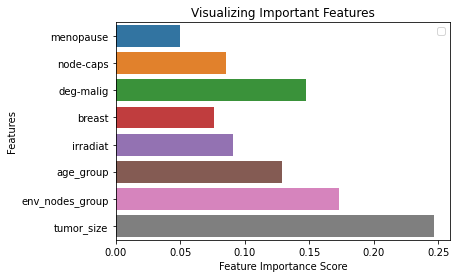

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_import, y=features)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()